In [ ]:
import pandas as pd
import numpy as np

In [ ]:
path="/content/Social_Network_Ads.csv"
df=pd.read_csv(path)

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# Convert 'Gender' and 'Purchased' to categorical variables
df['Gender'] = df['Gender'].astype('category')
df['Purchased'] = df['Purchased'].astype('category')

# Normalize 'Age' and 'EstimatedSalary' using MinMaxScaler
scaler = MinMaxScaler()
df[['Age', 'EstimatedSalary']] = scaler.fit_transform(df[['Age', 'EstimatedSalary']])

# Drop the 'User ID' column
df.drop('User ID', axis=1, inplace=True)

# Display the first few rows of the modified DataFrame
print(df.head())

   Gender       Age  EstimatedSalary Purchased
0    Male  0.023810         0.029630         0
1    Male  0.404762         0.037037         0
2  Female  0.190476         0.207407         0
3  Female  0.214286         0.311111         0
4    Male  0.023810         0.451852         0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})

X = df[['Age', 'EstimatedSalary', 'Gender']]
y = df[['Purchased']]

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,0.023810,0.029630,0
1,1,0.404762,0.037037,0
2,0,0.190476,0.207407,0
3,0,0.214286,0.311111,0
4,1,0.023810,0.451852,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are already defined

# Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

# K-Means (Note: K-Means is not a classifier, it's a clustering algorithm. Accuracy is not a valid metric for clustering.)
kmeans = KMeans(n_clusters=len(set(y_train)))  # Assuming the number of clusters equals the number of unique labels
kmeans.fit(X_train)
# For clustering, we don't predict on a test set, so we don't have an accuracy score

# KNN
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)

# ANN
ann_classifier = MLPClassifier()
ann_classifier.fit(X_train, y_train)
ann_predictions = ann_classifier.predict(X_test)
ann_accuracy = accuracy_score(y_test, ann_predictions)

# SVC
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
svc_predictions = svc_classifier.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predictions)

# Print out the accuracies
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")
print(f"KNN Accuracy: {knn_accuracy:.2f}")
print(f"ANN Accuracy: {ann_accuracy:.2f}")
print(f"SVC Accuracy: {svc_accuracy:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Decision Tree Accuracy: 0.84
KNN Accuracy: 0.93
ANN Accuracy: 0.88
SVC Accuracy: 0.93


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


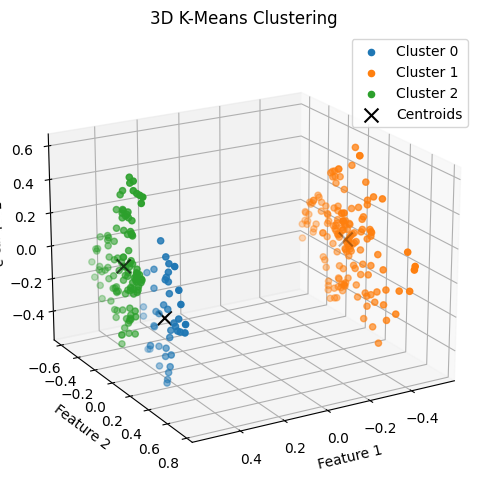

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Assuming 'X_train' is your input features and 'kmeans' is your fitted K-Means model
kmeans = KMeans(n_clusters=3)  # Replace with the appropriate number of clusters
kmeans.fit(X_train)
labels = kmeans.labels_

# Reduce dimensions to 3D for visualization
pca = PCA(n_components=3)
X_train_3D = pca.fit_transform(X_train)

# Plotting the clusters in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

unique_labels = set(labels)
for label in unique_labels:
    # Filter data points based on their cluster label
    cluster_points = X_train_3D[labels == label]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {label}')

# Plotting the centroids in 3D
centroids_3D = pca.transform(kmeans.cluster_centers_)
ax.scatter(centroids_3D[:, 0], centroids_3D[:, 1], centroids_3D[:, 2], marker='x', color='black', s=100, label='Centroids')

# Set labels and title
ax.set_title('3D K-Means Clustering')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

# Set the view angle
ax.view_init(elev=20, azim=60)  # You can change these angles to view the plot from different perspectives

plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='tanh'))  # Input layer
model.add(Dense(8, activation='softmax'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=150, batch_size=10, verbose=1)

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

Epoch 1/150
32/32 [==============================] - 2s 3ms/step - loss: 0.7044 - accuracy: 0.3187
Epoch 2/150
32/32 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.4812
Epoch 3/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6854 - accuracy: 0.6406
Epoch 4/150
32/32 [==============================] - 0s 3ms/step - loss: 0.6782 - accuracy: 0.6406
Epoch 5/150
32/32 [==============================] - 0s 3ms/step - loss: 0.6722 - accuracy: 0.6406
Epoch 6/150
32/32 [==============================] - 0s 3ms/step - loss: 0.6659 - accuracy: 0.6406
Epoch 7/150
32/32 [==============================] - 0s 3ms/step - loss: 0.6606 - accuracy: 0.6406
Epoch 8/150
32/32 [==============================] - 0s 3ms/step - loss: 0.6553 - accuracy: 0.6406
Epoch 9/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6500 - accuracy: 0.6406
Epoch 10/150
32/32 [==============================] - 0s 3ms/step - loss: 0.6440 - accuracy: 0.6406
Epoch 11/